In [108]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def grad_U(x):
    # gradient of U(x) = gradient of -ln(f(x))
    y = x
    return y

def f(x):
    y = np.exp(-0.5*x**2)
    return y

def H(x,p):
    return -np.log(f(x)) + 0.5*p**2

def Leapfrog(x,p,e):
    p = p - (e/2)*grad_U(x)
    x = x + e*p
    p = p - (e/2)*grad_U(x)
    return x, p

def Leapfrog2(x,p,e,L):
    result = [[x,p]]
    for _ in range(L):
        x,p = Leapfrog(x,p,e)
        result.append([x,p])
    result = pd.DataFrame(result, columns=['x','p'])
    return result

def HMC(x0,e,L):
    p0 = np.random.normal(0,1)
    x,p = Leapfrog2(x0,p0,0.01,100).iloc[-1]
    alpha = min(1, np.exp(-H(x,p)+H(x0,p0)))
    u = np.random.random()
    if u<alpha: x0 = x
    return x0

def HMC2(x0,e,L,M):
    result = [x0]
    for _ in range(M):
        x0 = HMC(x0,e,L)
        result.append(x0)
    return pd.DataFrame(result, columns=['x'])

In [109]:
x0 = 1
M = 10000
L = 100
epsilon = 0.01

result = HMC2(x0,epsilon,L,M)

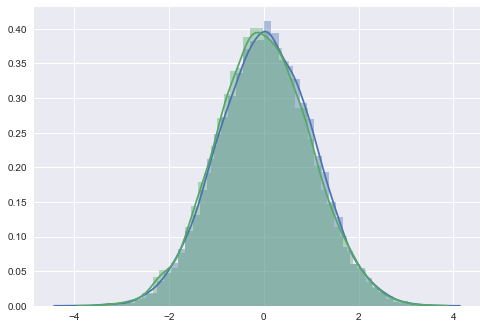

In [110]:
sns.distplot(result)
sns.distplot(np.random.normal(0,1,10000))
plt.show()